In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math

In [3]:
df = pd.read_csv("training.csv")
df

,Unnamed: 0,surface_x,surface_y,bh_x,bh_y,standardized_operator_name,gross_perforated_length,number_of_stages,total_proppant,total_fluid,...,relative_well_position,batch_frac_classification,well_family_relationship,frac_type,frac_seasoning,horizontal_midpoint_x,horizontal_midpoint_y,horizontal_toe_x,horizontal_toe_y,OilPeakRate
0,0,1383493.751,717329.2368,1382854.564,712767.3700,1121,3963.582677,NaN,76000.0000,NaN,...,Standalone Well,Unknown,Standalone Well,Primary Frac,NaN,1383030.678,714796.3610,1382668.912,712798.4321,46.623023
1,1,1380344.035,711916.2732,1379738.429,707860.5643,1022,3179.133858,NaN,113000.0000,5.610964e+05,...,Outer Well,Unknown,Infill Child Well,Primary Frac,NaN,1379965.126,709541.7145,1379630.025,707907.6708,59.750009
2,2,1379915.895,717845.0063,1379274.644,713471.9952,1304,3810.039370,12.0,286571.4286,1.621424e+06,...,Standalone Well,Non-Batch Frac,Standalone Well,Primary Frac,92.0,1379357.250,715381.2327,1378960.372,713530.4490,10.785716
3,3,1383567.443,706640.2010,1382891.477,702068.3838,1022,3723.425197,11.0,106878.9286,4.377134e+05,...,Standalone Well,Unknown,Standalone Well,Primary Frac,NaN,1383099.610,704058.8508,1382727.299,702098.4882,123.797638
4,4,1378962.585,702623.9787,1379643.546,707204.9131,1022,3811.023622,NaN,112789.7143,6.229802e+05,...,Outer Well,Unknown,Infill Child Well,Primary Frac,NaN,1379546.414,705150.7519,1379987.487,707123.7258,102.309540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29687,30087,1441088.593,978921.8705,1432758.032,979984.5869,1050,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Primary Frac,NaN,NaN,NaN,NaN,NaN,NaN
29688,30088,1513299.189,976157.4486,1519890.072,975148.4820,1159,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Primary Frac,NaN,NaN,NaN,NaN,NaN,NaN
29689,30089,1458652.142,972862.2346,1453129.889,973195.0998,1050,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Primary Frac,NaN,NaN,NaN,NaN,NaN,NaN
29690,30090,1463417.436,972485.8276,1468807.765,971564.9743,1153,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Primary Frac,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df[df["OilPeakRate"].notnull()] # Drop the columns where the dependent variable (OilPeakRate) is NaN

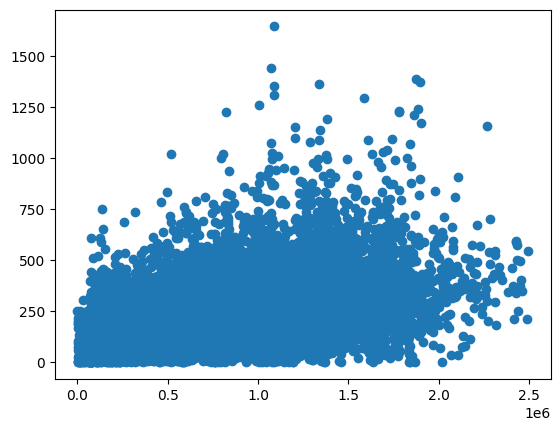

In [ ]:
df_total_proppant_drop_na = df[df["total_proppant"].notnull()]
max_proppant = max(df_total_proppant_drop_na["total_proppant"])
df_total_proppant_drop_na = df_total_proppant_drop_na[df_total_proppant_drop_na["total_proppant"] < max_proppant]
df_total_proppant_drop_na = df_total_proppant_drop_na[df_total_proppant_drop_na["OilPeakRate"] < 2000]
plt.scatter(df_total_proppant_drop_na["total_proppant"], df_total_proppant_drop_na["OilPeakRate"])

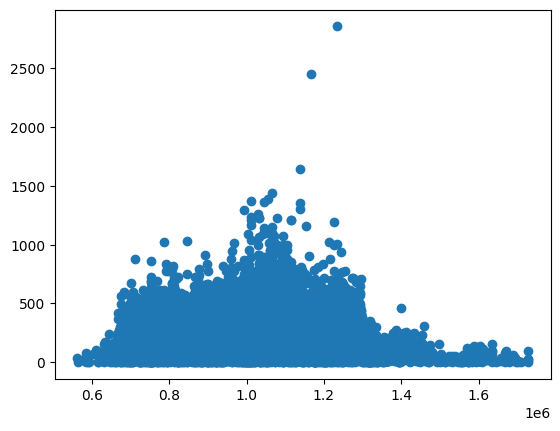

In [ ]:
plt.scatter(df_oilpeakrate_not_nan["surface_x"], df_oilpeakrate_not_nan["OilPeakRate"])

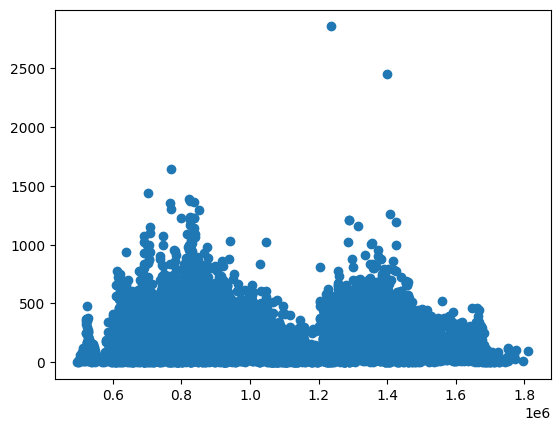

In [ ]:
plt.scatter(df_oilpeakrate_not_nan["surface_y"], df_oilpeakrate_not_nan["OilPeakRate"])

In [ ]:
df_stages_not_nan = df[df[["number_of_stages"]].notnull().all(1)]
df_stages_not_nan

,Unnamed: 0,surface_x,surface_y,bh_x,bh_y,standardized_operator_name,gross_perforated_length,number_of_stages,total_proppant,total_fluid,...,relative_well_position,batch_frac_classification,well_family_relationship,frac_type,frac_seasoning,horizontal_midpoint_x,horizontal_midpoint_y,horizontal_toe_x,horizontal_toe_y,OilPeakRate
2,2,1.379916e+06,7.178450e+05,1.379275e+06,7.134720e+05,1304,3810.039370,12.0,286571.42860,1.621424e+06,...,Standalone Well,Non-Batch Frac,Standalone Well,Primary Frac,92.0,1.379357e+06,7.153812e+05,1.378960e+06,7.135304e+05,10.785716
3,3,1.383567e+06,7.066402e+05,1.382891e+06,7.020684e+05,1022,3723.425197,11.0,106878.92860,4.377134e+05,...,Standalone Well,Unknown,Standalone Well,Primary Frac,NaN,1.383100e+06,7.040589e+05,1.382727e+06,7.020985e+05,123.797638
6,6,1.387301e+06,7.067661e+05,1.387981e+06,7.113368e+05,1349,4575.787402,10.0,140558.14290,8.479442e+05,...,Standalone Well,Unknown,Standalone Well,Primary Frac,NaN,1.387788e+06,7.092837e+05,1.388175e+06,7.113145e+05,123.286527
12,12,1.380288e+06,7.025037e+05,1.381269e+06,7.069759e+05,1022,3338.582677,11.0,130063.14290,6.863401e+05,...,Outer Well,Unknown,Sibling Well,Primary Frac,NaN,1.380950e+06,7.050388e+05,1.381428e+06,7.069328e+05,82.869060
19,19,1.375260e+06,7.025332e+05,1.374602e+06,6.979515e+05,1008,4012.795276,11.0,NaN,5.881631e+05,...,Inner Well,Unknown,Infill Child Well,Primary Frac,NaN,1.374780e+06,6.999379e+05,1.374435e+06,6.979819e+05,72.416678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29425,29425,9.366648e+05,9.505860e+05,9.322816e+05,9.527528e+05,1296,3878.937008,16.0,255385.50000,3.179996e+06,...,Standalone Well,Unknown,Standalone Well,Primary Frac,NaN,9.340959e+05,9.518762e+05,9.322833e+05,9.527507e+05,174.621059
29426,29426,9.313518e+05,1.060801e+06,9.291128e+05,1.059925e+06,1028,1379.921260,6.0,12136.50000,2.325137e+05,...,Inner Well,Batch-Sequential Frac,Infill Child Well,Primary Frac,32.0,9.296748e+05,1.060182e+06,9.290221e+05,1.059943e+06,4.157937
29428,29428,9.326688e+05,1.059044e+06,9.321407e+05,1.061026e+06,1028,1537.401575,6.0,36657.85714,3.105691e+05,...,Standalone Well,Non-Batch Frac,Standalone Well,Primary Frac,43.0,9.323204e+05,1.060374e+06,9.321414e+05,1.061027e+06,30.071433
29431,29431,9.411536e+05,9.364229e+05,9.372790e+05,9.384046e+05,1272,4194.881890,19.0,124907.28570,1.018071e+06,...,Standalone Well,Non-Batch Frac,Standalone Well,Primary Frac,9.0,9.389961e+05,9.376713e+05,9.372776e+05,9.384042e+05,292.226236


The following code cells impute the given data using KNN imputing. The last code cell implements a Random Forest model for prediction.

In [5]:
df_nums = df[["surface_x", "surface_y", "bh_x", "bh_y", "gross_perforated_length",
               "total_proppant", "total_fluid", "true_vertical_depth", "proppant_intensity",
               "frac_fluid_intensity", "horizontal_midpoint_x", "horizontal_midpoint_y", "horizontal_toe_x", "horizontal_toe_y",
               "OilPeakRate"]]

df_nums = df_nums[df_nums["OilPeakRate"].notnull()]
df_nums

,surface_x,surface_y,bh_x,bh_y,gross_perforated_length,total_proppant,total_fluid,true_vertical_depth,proppant_intensity,frac_fluid_intensity,horizontal_midpoint_x,horizontal_midpoint_y,horizontal_toe_x,horizontal_toe_y,OilPeakRate
0,1.383494e+06,7.173292e+05,1.382855e+06,7.127674e+05,3963.582677,76000.00000,NaN,8712.598425,19.174572,NaN,1.383031e+06,7.147964e+05,1.382669e+06,7.127984e+05,46.623023
1,1.380344e+06,7.119163e+05,1.379738e+06,7.078606e+05,3179.133858,113000.00000,5.610964e+05,8627.952756,35.544272,176.493480,1.379965e+06,7.095417e+05,1.379630e+06,7.079077e+05,59.750009
2,1.379916e+06,7.178450e+05,1.379275e+06,7.134720e+05,3810.039370,286571.42860,1.621424e+06,8801.181102,75.214821,425.566078,1.379357e+06,7.153812e+05,1.378960e+06,7.135304e+05,10.785716
3,1.383567e+06,7.066402e+05,1.382891e+06,7.020684e+05,3723.425197,106878.92860,4.377134e+05,8635.826772,28.704465,117.556659,1.383100e+06,7.040589e+05,1.382727e+06,7.020985e+05,123.797638
4,1.378963e+06,7.026240e+05,1.379644e+06,7.072049e+05,3811.023622,112789.71430,6.229802e+05,8664.370079,29.595648,163.467933,1.379546e+06,7.051508e+05,1.379987e+06,7.071237e+05,102.309540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29432,9.477118e+05,1.057502e+06,9.435419e+05,1.059277e+06,4101.377953,95857.14286,5.499711e+05,8877.952756,23.371936,134.094222,9.402878e+05,1.060680e+06,9.387423e+05,1.061414e+06,162.307168
29433,9.593475e+05,1.033564e+06,9.637629e+05,1.031391e+06,4512.795276,NaN,NaN,8479.330709,NaN,NaN,9.618238e+05,1.032362e+06,9.638230e+05,1.031362e+06,171.071455
29434,9.669162e+05,1.057804e+06,9.709082e+05,1.056045e+06,3660.433071,87857.14286,6.214390e+05,8640.748031,24.001844,169.771992,9.692139e+05,1.056818e+06,9.709078e+05,1.056042e+06,7.171827
29435,9.462629e+05,1.034169e+06,9.525089e+05,1.031066e+06,5930.118110,383857.14290,1.956479e+06,8389.763780,64.730101,329.922425,9.498084e+05,1.032405e+06,9.525121e+05,1.031066e+06,336.044270


In [6]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(df_nums, test_size=0.2, random_state=123)

In [7]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors = 5)

imputed_training = pd.DataFrame(knn_imputer.fit_transform(training_data), columns=training_data.columns)

imputed_training

,surface_x,surface_y,bh_x,bh_y,gross_perforated_length,total_proppant,total_fluid,true_vertical_depth,proppant_intensity,frac_fluid_intensity,horizontal_midpoint_x,horizontal_midpoint_y,horizontal_toe_x,horizontal_toe_y,OilPeakRate
0,9.483612e+05,6.861474e+05,9.384812e+05,6.879325e+05,9811.811024,2.094770e+06,1.003507e+07,9185.039370,213.494699,1022.753709,9.433585e+05,6.872740e+05,9.384801e+05,6.879327e+05,370.671367
1,1.195698e+06,1.236813e+06,1.188654e+06,1.240588e+06,7401.574803,7.974286e+05,3.753068e+06,9965.551181,107.737690,507.063491,1.191937e+06,1.238908e+06,1.188457e+06,1.240188e+06,141.050022
2,1.063635e+06,1.322136e+06,1.071980e+06,1.317653e+06,9822.834646,1.800571e+06,7.995736e+06,9192.913386,183.304666,813.994770,1.067502e+06,1.319642e+06,1.071942e+06,1.317652e+06,494.988172
3,7.558307e+05,8.583861e+05,7.545584e+05,8.483348e+05,6401.574803,1.112429e+06,5.748882e+06,10371.062990,173.774205,898.041761,7.554896e+05,8.548139e+05,7.550043e+05,8.515892e+05,75.690488
4,8.820184e+05,1.219295e+06,8.865037e+05,1.217241e+06,4556.102362,1.092857e+05,4.092798e+05,3059.055118,23.986668,89.831120,8.846179e+05,1.218102e+06,8.865051e+05,1.217240e+06,134.800815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15439,1.020502e+06,1.342177e+06,1.026456e+06,1.339001e+06,7237.204724,1.532429e+06,6.340013e+06,8580.708661,211.743156,876.030607,1.023226e+06,1.340450e+06,1.026456e+06,1.339002e+06,121.607162
15440,1.023601e+06,1.416476e+06,1.033394e+06,1.412131e+06,9954.724409,1.008429e+06,5.489434e+06,7998.031496,101.301506,551.440113,1.028842e+06,1.414296e+06,1.033392e+06,1.412131e+06,98.190491
15441,7.253396e+05,9.454556e+05,7.299879e+05,9.451874e+05,4045.275591,6.337143e+05,2.602723e+06,10332.677170,156.655405,643.398315,7.281687e+05,9.454555e+05,7.298903e+05,9.450916e+05,81.165886
15442,9.334509e+05,1.332095e+06,9.283964e+05,1.334452e+06,4946.850394,7.295714e+05,3.078176e+06,9485.236220,147.482008,622.249761,9.305698e+05,1.333485e+06,9.283946e+05,1.334452e+06,107.571445


In [24]:
imputed_training.to_csv("imputed_data.csv")
testing_data.to_csv("testing_data.csv")

In [10]:
df = pd.read_csv("onehotencoded.csv")

In [11]:
df = df[df["OilPeakRate"].notnull()]
df = df.drop(["Unnamed: 0.1", "Unnamed: 0", "frac_type"], axis=1)
df = df.drop(17860)
df

,surface_x,surface_y,bh_x,bh_y,standardized_operator_name,gross_perforated_length,number_of_stages,total_proppant,total_fluid,true_vertical_depth,...,well_family_relationship_Infill Child Well,well_family_relationship_Sibling Well,well_family_relationship_Standalone Well,well_family_relationship_Unknown,well_family_relationship_nan,well_family_relationship_Infill Child Well.1,well_family_relationship_Sibling Well.1,well_family_relationship_Standalone Well.1,well_family_relationship_Unknown.1,well_family_relationship_nan.1
0,1.383494e+06,7.173292e+05,1.382855e+06,7.127674e+05,1121,3963.582677,NaN,76000.00000,NaN,8712.598425,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.380344e+06,7.119163e+05,1.379738e+06,7.078606e+05,1022,3179.133858,NaN,113000.00000,5.610964e+05,8627.952756,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.379916e+06,7.178450e+05,1.379275e+06,7.134720e+05,1304,3810.039370,12.0,286571.42860,1.621424e+06,8801.181102,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.383567e+06,7.066402e+05,1.382891e+06,7.020684e+05,1022,3723.425197,11.0,106878.92860,4.377134e+05,8635.826772,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.378963e+06,7.026240e+05,1.379644e+06,7.072049e+05,1022,3811.023622,NaN,112789.71430,6.229802e+05,8664.370079,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29432,9.477118e+05,1.057502e+06,9.435419e+05,1.059277e+06,1018,4101.377953,NaN,95857.14286,5.499711e+05,8877.952756,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29433,9.593475e+05,1.033564e+06,9.637629e+05,1.031391e+06,1018,4512.795276,NaN,NaN,NaN,8479.330709,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
29434,9.669162e+05,1.057804e+06,9.709082e+05,1.056045e+06,1164,3660.433071,NaN,87857.14286,6.214390e+05,8640.748031,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29435,9.462629e+05,1.034169e+06,9.525089e+05,1.031066e+06,1018,5930.118110,NaN,383857.14290,1.956479e+06,8389.763780,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [12]:
training_data, testing_data = train_test_split(df, test_size=0.2, random_state=123)

knn_imputer = KNNImputer(n_neighbors = 5)

imputed_training = pd.DataFrame(knn_imputer.fit_transform(training_data), columns=training_data.columns)


imputed_training

,surface_x,surface_y,bh_x,bh_y,standardized_operator_name,gross_perforated_length,number_of_stages,total_proppant,total_fluid,true_vertical_depth,...,well_family_relationship_Infill Child Well,well_family_relationship_Sibling Well,well_family_relationship_Standalone Well,well_family_relationship_Unknown,well_family_relationship_nan,well_family_relationship_Infill Child Well.1,well_family_relationship_Sibling Well.1,well_family_relationship_Standalone Well.1,well_family_relationship_Unknown.1,well_family_relationship_nan.1
0,8.172024e+05,9.265558e+05,8.116360e+05,9.263142e+05,1213.0,4845.472441,29.2,5.945714e+05,3.388673e+06,10610.236220,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,9.483612e+05,6.861474e+05,9.384812e+05,6.879325e+05,1025.0,9811.811024,51.0,2.094770e+06,1.003507e+07,9185.039370,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.183221e+06,1.368990e+06,1.175806e+06,1.372258e+06,1064.0,7374.015748,29.6,4.901429e+05,2.690779e+06,8501.968504,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.037916e+06,1.281925e+06,1.028738e+06,1.285580e+06,1213.0,9219.488189,48.2,1.459429e+06,9.482477e+06,8834.645669,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,8.563371e+05,7.739649e+05,8.516148e+05,7.746281e+05,1349.0,4033.464567,20.0,3.350000e+05,2.643167e+06,11055.118110,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15439,1.097769e+06,1.297512e+06,1.105065e+06,1.294191e+06,1293.0,7577.755906,44.8,1.200857e+06,5.387532e+06,8460.629921,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15440,1.023601e+06,1.416476e+06,1.033394e+06,1.412131e+06,1064.0,9954.724409,45.6,1.008429e+06,5.489434e+06,7998.031496,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15441,7.293569e+05,9.437886e+05,7.249662e+05,9.447996e+05,1285.0,3887.795276,22.0,6.355357e+05,2.660947e+06,10297.244090,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15442,9.334783e+05,1.332151e+06,9.284066e+05,1.334470e+06,1018.0,4836.614173,28.6,7.088571e+05,3.094312e+06,9006.889764,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [54]:
testing_data.columns.to_series()[np.isinf(df).any()]

Series([], dtype: object)

In [45]:
df.index[np.isinf(df).any(1)]

<ipython-input-45-858a91c24ac6>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df.index[np.isinf(df).any(1)]


Int64Index([17860], dtype='int64')

In [56]:
imputed_training.dropna()

,surface_x,surface_y,bh_x,bh_y,standardized_operator_name,gross_perforated_length,number_of_stages,total_proppant,total_fluid,true_vertical_depth,...,well_family_relationship_Infill Child Well,well_family_relationship_Sibling Well,well_family_relationship_Standalone Well,well_family_relationship_Unknown,well_family_relationship_nan,well_family_relationship_Infill Child Well.1,well_family_relationship_Sibling Well.1,well_family_relationship_Standalone Well.1,well_family_relationship_Unknown.1,well_family_relationship_nan.1
0,8.172024e+05,9.265558e+05,8.116360e+05,9.263142e+05,1213.0,4845.472441,29.2,5.945714e+05,3.388673e+06,10610.236220,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,9.483612e+05,6.861474e+05,9.384812e+05,6.879325e+05,1025.0,9811.811024,51.0,2.094770e+06,1.003507e+07,9185.039370,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.183221e+06,1.368990e+06,1.175806e+06,1.372258e+06,1064.0,7374.015748,29.6,4.901429e+05,2.690779e+06,8501.968504,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.037916e+06,1.281925e+06,1.028738e+06,1.285580e+06,1213.0,9219.488189,48.2,1.459429e+06,9.482477e+06,8834.645669,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,8.563371e+05,7.739649e+05,8.516148e+05,7.746281e+05,1349.0,4033.464567,20.0,3.350000e+05,2.643167e+06,11055.118110,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15439,1.097769e+06,1.297512e+06,1.105065e+06,1.294191e+06,1293.0,7577.755906,44.8,1.200857e+06,5.387532e+06,8460.629921,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15440,1.023601e+06,1.416476e+06,1.033394e+06,1.412131e+06,1064.0,9954.724409,45.6,1.008429e+06,5.489434e+06,7998.031496,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15441,7.293569e+05,9.437886e+05,7.249662e+05,9.447996e+05,1285.0,3887.795276,22.0,6.355357e+05,2.660947e+06,10297.244090,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15442,9.334783e+05,1.332151e+06,9.284066e+05,1.334470e+06,1018.0,4836.614173,28.6,7.088571e+05,3.094312e+06,9006.889764,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [53]:
imputed_training.to_csv("ohe_imputed.csv")

In [14]:
imputed_testing = pd.DataFrame(knn_imputer.fit_transform(testing_data), columns=testing_data.columns)

imputed_testing

,surface_x,surface_y,bh_x,bh_y,standardized_operator_name,gross_perforated_length,number_of_stages,total_proppant,total_fluid,true_vertical_depth,...,well_family_relationship_Infill Child Well,well_family_relationship_Sibling Well,well_family_relationship_Standalone Well,well_family_relationship_Unknown,well_family_relationship_nan,well_family_relationship_Infill Child Well.1,well_family_relationship_Sibling Well.1,well_family_relationship_Standalone Well.1,well_family_relationship_Unknown.1,well_family_relationship_nan.1
0,1.064383e+06,1.272374e+06,1.073104e+06,1.268551e+06,1025.0,8445.866142,52.0,9.794579e+05,6.920308e+06,9676.181102,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.126644e+06,1.121417e+06,1.120137e+06,1.124298e+06,1156.0,6346.456693,22.0,3.110843e+05,2.037630e+06,10714.566930,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.084304e+06,7.477446e+05,1.080154e+06,7.532878e+05,1316.0,6030.511811,18.8,1.491429e+05,6.904786e+05,7960.629921,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,9.298972e+05,1.336312e+06,9.244940e+05,1.338768e+06,1018.0,5000.984252,27.2,6.157143e+05,4.021489e+06,9401.574803,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.258682e+06,6.993923e+05,1.257737e+06,6.946681e+05,1213.0,4145.669291,14.0,4.502629e+05,1.926015e+06,8676.181102,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3856,8.839418e+05,8.941893e+05,8.803037e+05,8.918446e+05,1049.0,3535.433071,12.2,7.528571e+04,4.617761e+05,10650.590550,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3857,9.046613e+05,1.127140e+06,9.004204e+05,1.129843e+06,1030.0,3933.070866,13.2,8.057143e+04,8.587060e+05,5311.023622,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3858,9.802337e+05,1.320126e+06,9.746761e+05,1.321322e+06,1344.0,7591.535433,44.6,1.651857e+06,7.491466e+06,8796.259843,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3859,9.282313e+05,7.499934e+05,9.208623e+05,7.509355e+05,1086.0,6259.842520,32.0,9.630000e+05,4.782278e+06,10351.377950,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [55]:
testing_data.to_csv("ohe_testing.csv")

In [62]:
imputed_testing.to_csv("ohe_imputed_testing.csv")

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
train_data = imputed_training
test_data = imputed_testing

# Extract the target variable and predictor variables
X_train = train_data.drop('OilPeakRate', axis=1)
y_train = train_data['OilPeakRate']

X_test = test_data.drop('OilPeakRate', axis=1)
y_test = test_data['OilPeakRate']

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=123)
rf_model.fit(X_train, y_train)


# Make predictions on the testing set
# predictions = rf_model.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, predictions)
# print(f'Mean Squared Error: {mse}')

# # Visualize results
# plt.scatter(predictions, y_test, alpha=0.5)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Actual vs Predicted')
# plt.show()

# print(math.sqrt(mse))

RandomForestRegressor(random_state=123)

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [46]:
df = pd.read_csv("scoring.csv")

In [47]:
categorical_columns = ['ffs_frac_type', 'bin_lateral_length', 'frac_type',
                           'relative_well_position', 'batch_frac_classification', 
                           'well_family_relationship', 'well_family_relationship']
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(df[categorical_columns])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))
df = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)

df

/Users/gabrielong/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Unnamed: 0,surface_x,surface_y,bh_x,bh_y,standardized_operator_name,gross_perforated_length,number_of_stages,total_proppant,total_fluid,...,batch_frac_classification_Non-Batch Frac,batch_frac_classification_Unknown,well_family_relationship_Infill Child Well,well_family_relationship_Sibling Well,well_family_relationship_Standalone Well,well_family_relationship_Unknown,well_family_relationship_Infill Child Well,well_family_relationship_Sibling Well,well_family_relationship_Standalone Well,well_family_relationship_Unknown
0,29437,9.471472e+05,1.035963e+06,9.533961e+05,1.032855e+06,1018,6370.078740,13.0,360142.8571,2.049015e+06,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,29438,9.556775e+05,1.046164e+06,9.502650e+05,1.048815e+06,1018,5244.094488,13.0,376714.2857,1.876124e+06,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,29439,9.546967e+05,1.045332e+06,9.480919e+05,1.048610e+06,1018,6694.881890,13.0,438285.7143,2.773870e+06,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,29441,9.580318e+05,1.040111e+06,9.480919e+05,1.048610e+06,1018,6694.881890,13.0,438285.7143,2.773870e+06,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,29442,9.679726e+05,1.038412e+06,9.640951e+05,1.040346e+06,1018,2520.669291,13.0,273857.1429,1.340587e+06,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,30036,1.482062e+06,9.541835e+05,1.477185e+06,9.549271e+05,1066,4302.165354,20.0,215285.7143,1.163932e+06,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
396,30037,1.481784e+06,9.519994e+05,1.476807e+06,9.527581e+05,1066,4342.519685,20.0,228571.4286,1.303240e+06,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
397,30038,1.470326e+06,9.259947e+05,1.462248e+06,9.269993e+05,1238,7380.905512,20.0,450857.1429,2.174185e+06,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
398,30046,1.432107e+06,9.590904e+05,1.424449e+06,9.602636e+05,1237,7357.283465,20.0,228714.2857,1.035400e+06,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [48]:
df = df.drop("Unnamed: 0", axis=1)

In [61]:
feature_list = ["batch_frac_classification_nan", "bin_lateral_length_2.5", "bin_lateral_length_3.0", 
                "bin_lateral_length_nan", "ffs_frac_type_Linear Only", "ffs_frac_type_nan",
               "well_family_relationship_Infill Child Well.1", "well_family_relationship_Sibling Well.1",
               "well_family_relationship_Standalone Well.1", "relative_well_position_nan", 
               "well_family_relationship_Unknown.1", "well_family_relationship_nan",
               "well_family_relationship_nan.1"]


df1 = pd.DataFrame(0, index=np.arange(500), columns=feature_list)

df1

,batch_frac_classification_nan,bin_lateral_length_2.5,bin_lateral_length_3.0,bin_lateral_length_nan,ffs_frac_type_Linear Only,ffs_frac_type_nan,well_family_relationship_Infill Child Well.1,well_family_relationship_Sibling Well.1,well_family_relationship_Standalone Well.1,relative_well_position_nan,well_family_relationship_Unknown.1,well_family_relationship_nan,well_family_relationship_nan.1
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,0,0,0,0,0,0
496,0,0,0,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,0,0,0


In [72]:
df2 = pd.concat([df, df1], axis=1)

df2 = df2.drop(["frac_type_Primary Frac", "frac_type_Refrac"], axis=1)

train_data = train_data.drop("OilPeakRate", axis=1)

columns = train_data.columns

df2 = df2[columns]

df2

,surface_x,surface_y,bh_x,bh_y,standardized_operator_name,gross_perforated_length,number_of_stages,total_proppant,total_fluid,true_vertical_depth,...,well_family_relationship_Standalone Well,well_family_relationship_Standalone Well,well_family_relationship_Unknown,well_family_relationship_Unknown,well_family_relationship_nan,well_family_relationship_Infill Child Well.1,well_family_relationship_Sibling Well.1,well_family_relationship_Standalone Well.1,well_family_relationship_Unknown.1,well_family_relationship_nan.1
0,947147.1748,1035962.615,953396.0947,1032855.270,1018.0,6370.078740,13.0,360142.8571,2049015.067,8337.598425,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1,955677.5229,1046163.699,950265.0303,1048815.456,1018.0,5244.094488,13.0,376714.2857,1876123.612,8808.070866,...,1.0,1.0,0.0,0.0,0,0,0,0,0,0
2,954696.7455,1045332.222,948091.9154,1048609.702,1018.0,6694.881890,13.0,438285.7143,2773869.727,8638.779528,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
3,958031.7779,1040111.409,948091.9154,1048609.702,1018.0,6694.881890,13.0,438285.7143,2773869.727,8536.417323,...,1.0,1.0,0.0,0.0,0,0,0,0,0,0
4,967972.6000,1038411.501,964095.0748,1040346.080,1018.0,2520.669291,13.0,273857.1429,1340587.457,8668.307087,...,1.0,1.0,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0


In [40]:
testing_data.head(5)

,surface_x,surface_y,bh_x,bh_y,standardized_operator_name,gross_perforated_length,number_of_stages,total_proppant,total_fluid,true_vertical_depth,...,well_family_relationship_Infill Child Well,well_family_relationship_Sibling Well,well_family_relationship_Standalone Well,well_family_relationship_Unknown,well_family_relationship_nan,well_family_relationship_Infill Child Well.1,well_family_relationship_Sibling Well.1,well_family_relationship_Standalone Well.1,well_family_relationship_Unknown.1,well_family_relationship_nan.1
19305,1.064383e+06,1.272374e+06,1.073104e+06,1.268551e+06,1025,8445.866142,52.0,979457.8571,6.920308e+06,9676.181102,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7731,1.126644e+06,1.121417e+06,1.120137e+06,1.124298e+06,1156,6346.456693,22.0,311084.2857,2.037630e+06,10714.566930,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1280,1.084304e+06,7.477446e+05,1.080154e+06,7.532878e+05,1316,6030.511811,NaN,149142.8571,6.904786e+05,7960.629921,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28041,9.298972e+05,1.336312e+06,9.244940e+05,1.338768e+06,1018,5000.984252,NaN,615714.2857,4.021489e+06,9401.574803,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1482,1.258682e+06,6.993923e+05,1.257737e+06,6.946681e+05,1213,4145.669291,14.0,450262.8571,1.926015e+06,8676.181102,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [82]:
df2 = df2.dropna()

df2 = df2.drop(df2.columns[[57, 58, 59, 60]], axis=1)

df2

,surface_x,surface_y,bh_x,bh_y,standardized_operator_name,gross_perforated_length,number_of_stages,total_proppant,total_fluid,true_vertical_depth,...,well_family_relationship_Infill Child Well,well_family_relationship_Infill Child Well,well_family_relationship_Sibling Well,well_family_relationship_Sibling Well,well_family_relationship_Standalone Well,well_family_relationship_Standalone Well,well_family_relationship_Unknown,well_family_relationship_Unknown,well_family_relationship_nan,well_family_relationship_Infill Child Well.1
0,9.471472e+05,1.035963e+06,9.533961e+05,1.032855e+06,1018.0,6370.078740,13.0,360142.8571,2.049015e+06,8337.598425,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0
1,9.556775e+05,1.046164e+06,9.502650e+05,1.048815e+06,1018.0,5244.094488,13.0,376714.2857,1.876124e+06,8808.070866,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0
2,9.546967e+05,1.045332e+06,9.480919e+05,1.048610e+06,1018.0,6694.881890,13.0,438285.7143,2.773870e+06,8638.779528,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,9.580318e+05,1.040111e+06,9.480919e+05,1.048610e+06,1018.0,6694.881890,13.0,438285.7143,2.773870e+06,8536.417323,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0
4,9.679726e+05,1.038412e+06,9.640951e+05,1.040346e+06,1018.0,2520.669291,13.0,273857.1429,1.340587e+06,8668.307087,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.482062e+06,9.541835e+05,1.477185e+06,9.549271e+05,1066.0,4302.165354,20.0,215285.7143,1.163932e+06,5226.377953,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
396,1.481784e+06,9.519994e+05,1.476807e+06,9.527581e+05,1066.0,4342.519685,20.0,228571.4286,1.303240e+06,5245.078740,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0
397,1.470326e+06,9.259947e+05,1.462248e+06,9.269993e+05,1238.0,7380.905512,20.0,450857.1429,2.174185e+06,5288.385827,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0
398,1.432107e+06,9.590904e+05,1.424449e+06,9.602636e+05,1237.0,7357.283465,20.0,228714.2857,1.035400e+06,5109.251969,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0


In [83]:
predictions = rf_model.predict(df2.values)

/Users/gabrielong/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [85]:
predictions = pd.Series(predictions)

In [86]:
predictions

0      133.088125
1      150.614261
2      163.146563
3      172.848082
4      104.880371
          ...    
395     70.913466
396     57.304613
397    114.209669
398     87.549915
399     60.558528
Length: 400, dtype: float64

LASSO using sklearn

In [87]:
predictions.to_csv("submission_format.csv")

In [88]:
df2.to_csv("zeros.csv")

In [15]:
from sklearn import linear_model

X_train = imputed_training.drop('OilPeakRate', axis=1)
y_train = imputed_training['OilPeakRate']

clf = linear_model.Lasso(alpha=0.1, max_iter = 10000)

clf.fit(X_train, y_train)

print(clf.coef_)

print(clf.intercept_)

[-2.29043923e-04 -1.04726117e-03 -2.77454827e-04  2.17642006e-04
  2.44069814e-02  1.12828486e-04 -1.36227908e-05  2.29056395e-02
 -5.36762970e-01  1.64386103e-01  2.55393209e-04  2.65067368e-04
  3.62231503e-04  4.64753031e-04]
-207.3842727718998


/Users/gabrielong/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.152e+08, tolerance: 3.724e+04
  model = cd_fast.enet_coordinate_descent(


In [20]:
testing_data = testing_data.dropna()
y_hat = clf.predict(testing_data.drop("OilPeakRate", axis=1))

In [21]:
testing_data.shape

(3261, 15)

In [24]:
sum(((testing_data["OilPeakRate"] - y_hat) ** 2) / 3261)

16026.540374774566